# Задачи

### 1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
### 2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
### 3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
### 4. Визуализируйте продажи по дням.
### 5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 


In [2]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

%matplotlib inline

import os

In [3]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-prokofev'

In [27]:
# Для визуального сокращения обем записи пути для файлов, поместим общую часть
# пути в переменную common_path
common_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-prokofev/shared/homeworks/python_ds_miniprojects/4/data'

### 1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [88]:
# Создадим универсальный способ считывания данных, записанных в таком виде
# Для этого начнем с того, что создадим словарь, в котором для каждой даты
# будет предоставлен списко имен для нее
dates = os.listdir(common_path)
names = [os.listdir(common_path + '/' + dates[i]) for i in range(len(dates))]
date_names_dict = dict(zip(dates, names))
date_names_dict[dates[0]][0]  #Проверка правильности вызова первого элемента


'Petr_Ivanov'

In [89]:
# Создаем датафрейм, к которому будем присоединять каждый последующий

main_df = pd.read_csv(common_path + '/' + dates[0] + '/' + date_names_dict[dates[0]][0] + '/data.csv', index_col=0)
main_df[['name']] = [date_names_dict[dates[0]][0] for i in range(main_df.shape[0])]
main_df[['date']] = [dates[0] for i in range(main_df.shape[0])]

# Удаляем имя, из которого только что получили датафрейм, чтобы в дальнейшем
# при считывании не было повторений

del date_names_dict[dates[0]][0]
# date_names_dict

# ВНИМАНИЕ: Ячейка специально отделена от списка ниже, потому что используется
# del. Если запустить эту ячейку больше одного раза, не перезапустив предыдущую
# удалится больше одного значения из словарика

In [90]:
# Создаем цикл, в котором те же действия, что и в ячейке выше будут проведены
# для всех остальных датасетов
for date in dates:
    for name in date_names_dict[date]:
        to_be_added_df = pd.read_csv(common_path + '/' + date + '/' + name + '/data.csv', index_col=0)
        to_be_added_df[['name']] = [name for i in range(to_be_added_df.shape[0])]
        to_be_added_df[['date']] = [date for i in range(to_be_added_df.shape[0])]
        main_df = pd.concat([main_df, to_be_added_df])

main_df = main_df.reset_index(drop=True)
main_df.quantity.sum()

480

### 2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [101]:
# Сгруппируем датафрейм по именам и посчитаем количество покупок каждого
num_of_bought_goods = main_df.groupby('name', as_index=False).agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    
# Выберем из полученного датасета только максимальные значения
num_of_bought_goods.query('quantity == quantity.max()')

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


### 3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?


,product_id,quantity
42,56,18


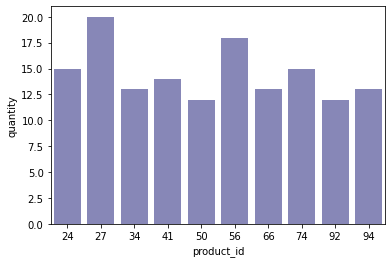

In [116]:
# Сгруппируем значения по типу товара и посчитаем его количество. Отсортируем
# полученный датасет по убыванию количества проданных товаровю
# Во время построения гисограммы, укажем в data, что нужно взять только
# первые 10 значений (топ-10).
popularity_of_products = main_df.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)
ax = sns.barplot(x='product_id', y='quantity', data=popularity_of_products.head(10) \
                ,color='navy', alpha=0.5)
popularity_of_products.query('product_id == 56') # Для ответа на задание

### 4. Визуализируйте продажи по дням.


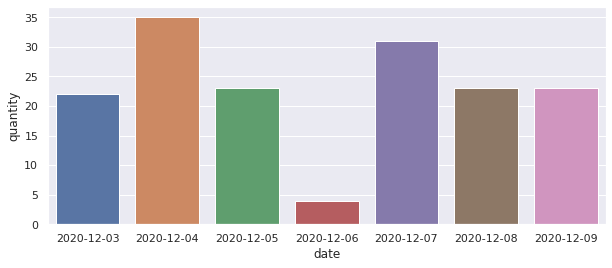

In [129]:
# Сгруппируем значения из общего датасета по дате и посчитаем количество продаж
# для каждой из них
daily_activity = main_df.groupby('date', as_index=False) \
    .agg({'quantity': 'count'})
# Для уточнения размера графика
sns.set(rc={"figure.figsize": ( 10 , 4 )})
ax = sns.barplot(x ='date', y='quantity' \
                 , data=daily_activity)

### 5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [130]:
main_df

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [144]:
# Сгруппируем главный датафрейм по продуктам и именам людей, которые их 
# приобрели. Теперь посчитаем количество уникальных дат, в которые их приобрел
# каждый из пользователей. Когда товар приобрели в разные даты, число 
# уникальных дат будет больше 1. Отсоритируем датафрейм по этому значению.
# Получилось, что всего два человека приобрели продукт больше одного раза
bought_more_than_once = main_df.groupby(['product_id', 'name'], as_index=[False, False]) \
    .agg({'date': 'nunique'}) \
    .sort_values('date', ascending=False) \
    .query('date == date.max()')
bought_more_than_once

,,date
product_id,name,
15,Anton_Ivanov,2
94,Petr_Fedorov,2
